In [1]:
!pip install -q kaggle
from google . colab import files
files . upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mhammadibrahim","key":"0babc8337473f18808e4c616bab89c32"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d saurabhshahane/ecommerce-text-classification

  0% 0.00/7.86M [00:00<?, ?B/s]
100% 7.86M/7.86M [00:00<00:00, 101MB/s]


In [6]:
!unzip /content/ecommerce-text-classification.zip

Archive:  /content/ecommerce-text-classification.zip
  inflating: ecommerceDataset.csv    


In [29]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("ecommerceDataset.csv")

df['label']=df['Household']
df['text'] = df['Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room.']

df= df.drop('Household',axis=1)
df= df.drop('Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room.',axis=1)

df.head()

,label,text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [31]:
df.shape

(50424, 2)

In [8]:
#check the distribution of labels 
df['label'].value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

In [9]:
min_samples = 8671
df_Household= df[df.label=="Household"].sample(min_samples, random_state=2022)
df_Books = df[df.label=="Books"].sample(min_samples, random_state=2022)
df_Electronics = df[df.label=="Electronics"].sample(min_samples, random_state=2022)
df_Clothing_Accessories = df[df.label=="Clothing & Accessories"].sample(min_samples, random_state=2022)

In [10]:
df_balanced = pd.concat([df_Household,df_Books,df_Electronics,df_Clothing_Accessories],axis=0)
df_balanced.label.value_counts()
df_balanced.head()

,label,text
14608,Household,Whirlpool 1.5 Ton 3 Star Inverter Split AC (Al...
16167,Household,"Lloyd 1.5 Ton 3 Star Window AC (LW19A3N, White..."
5586,Household,Amazon Brand - Solimo 100% Cotton 6 Piece Towe...
10560,Household,KCL Stainless Steel Collander 12 Inches / Vege...
18349,Household,looms & weaves Cotton Blend Bath Towels (White...


In [11]:
#Add the new column which gives a unique number to each of these labels 

df_balanced['label_num'] = df_balanced['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df_balanced.head(5)

,label,text,label_num
14608,Household,Whirlpool 1.5 Ton 3 Star Inverter Split AC (Al...,0
16167,Household,"Lloyd 1.5 Ton 3 Star Window AC (LW19A3N, White...",0
5586,Household,Amazon Brand - Solimo 100% Cotton 6 Piece Towe...,0
10560,Household,KCL Stainless Steel Collander 12 Inches / Vege...,0
18349,Household,looms & weaves Cotton Blend Bath Towels (White...,0


In [12]:
# Remove any rows with missing values
df_balanced.dropna(inplace=True)

In [13]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-15 11:00:31.944899: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 11:00:33.375234: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-15 11:00:33.375405: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [14]:
#import spacy and load the language model downloaded

import spacy
nlp = spacy.load("en_core_web_lg")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


***Preprocess the text***

In [15]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation


def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [16]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]

df_balanced['preprocessed_text'] = df_balanced['text'].apply(lambda text: preprocess(text))

In [17]:
df_balanced.head()

,label,text,label_num,preprocessed_text
14608,Household,Whirlpool 1.5 Ton 3 Star Inverter Split AC (Al...,0,Whirlpool 1.5 Ton 3 Star Inverter Split AC Alu...
16167,Household,"Lloyd 1.5 Ton 3 Star Window AC (LW19A3N, White...",0,Lloyd 1.5 Ton 3 Star Window AC LW19A3N White e...
5586,Household,Amazon Brand - Solimo 100% Cotton 6 Piece Towe...,0,Amazon Brand Solimo 100 Cotton 6 Piece Towel S...
10560,Household,KCL Stainless Steel Collander 12 Inches / Vege...,0,KCL Stainless Steel Collander 12 inch Vegetabl...
18349,Household,looms & weaves Cotton Blend Bath Towels (White...,0,loom weave Cotton Blend Bath Towels White 62 x...


***Get the spacy embeddings for each preprocessed text***

In [18]:
#create a new column "vector" that store the vector representation of each pre-processed text

df_balanced['vector'] = df_balanced['preprocessed_text'].apply(lambda text: nlp(text).vector) 

In [19]:
df_balanced.head()

,label,text,label_num,preprocessed_text,vector
14608,Household,Whirlpool 1.5 Ton 3 Star Inverter Split AC (Al...,0,Whirlpool 1.5 Ton 3 Star Inverter Split AC Alu...,"[-2.311108, 0.47944754, -1.0742669, 0.8736875,..."
16167,Household,"Lloyd 1.5 Ton 3 Star Window AC (LW19A3N, White...",0,Lloyd 1.5 Ton 3 Star Window AC LW19A3N White e...,"[-1.1028033, 1.0609801, -2.4755747, 2.3374927,..."
5586,Household,Amazon Brand - Solimo 100% Cotton 6 Piece Towe...,0,Amazon Brand Solimo 100 Cotton 6 Piece Towel S...,"[-2.3464665, -0.8853901, -0.17241296, 1.868195..."
10560,Household,KCL Stainless Steel Collander 12 Inches / Vege...,0,KCL Stainless Steel Collander 12 inch Vegetabl...,"[-0.4990953, -0.5368389, -2.2032828, 2.3282547..."
18349,Household,looms & weaves Cotton Blend Bath Towels (White...,0,loom weave Cotton Blend Bath Towels White 62 x...,"[-1.7331914, -0.07115496, -1.6153125, 0.721227..."


***Train-Test splitting***

In [21]:
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.vector.values, 
    df_balanced.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.label_num
)

***Reshape the X_train and X_test so as to fit for models***

In [22]:
import numpy as np

print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (27746,)
Shape of X_test before reshaping:  (6937,)
Shape of X_train after reshaping:  (27746, 300)
Shape of X_test after reshaping:  (6937, 300)


***Attempt 1: Decision Tree***

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1734
           1       0.94      0.92      0.93      1735
           2       0.90      0.91      0.90      1734
           3       0.91      0.92      0.91      1734

    accuracy                           0.90      6937
   macro avg       0.90      0.90      0.90      6937
weighted avg       0.90      0.90      0.90      6937



***Attempt 2:MultinomialNB***

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()                                         
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object 
clf = MultinomialNB()

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed , y_train) 


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1734
           1       0.93      0.89      0.91      1735
           2       0.86      0.81      0.84      1734
           3       0.90      0.84      0.87      1734

    accuracy                           0.85      6937
   macro avg       0.85      0.85      0.85      6937
weighted avg       0.85      0.85      0.85      6937



***Attempt 3:KNeighborsClassifier***

In [25]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1734
           1       0.98      0.93      0.95      1735
           2       0.92      0.94      0.93      1734
           3       0.94      0.97      0.95      1734

    accuracy                           0.93      6937
   macro avg       0.93      0.93      0.93      6937
weighted avg       0.93      0.93      0.93      6937



***Attempt 4:RandomForestClassifier***

In [26]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1734
           1       0.99      0.96      0.97      1735
           2       0.97      0.95      0.96      1734
           3       0.97      0.97      0.97      1734

    accuracy                           0.96      6937
   macro avg       0.96      0.96      0.96      6937
weighted avg       0.96      0.96      0.96      6937



***Attempt 5:GradientBoostingClassifier***

In [27]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1734
           1       0.97      0.94      0.96      1735
           2       0.94      0.92      0.93      1734
           3       0.95      0.97      0.96      1734

    accuracy                           0.94      6937
   macro avg       0.94      0.94      0.94      6937
weighted avg       0.94      0.94      0.94      6937



***Print the confusion Matrix with the best model got***

Text(69.0, 0.5, 'Truth')

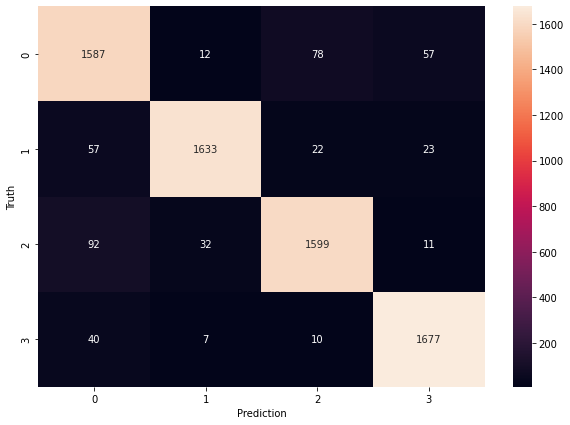

In [28]:
#finally print the confusion matrix for the best model: GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')